<a href="https://colab.research.google.com/github/vkuma13/Vicky_Port1/blob/main/Sales_Department_skeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1l7bHyrjzq839zVZE06cfdDksLabCN2hg"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Future Sales Time-series Prediction 
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1vi45x-LGEzwvJoQstierOC1QZ11QQUmS)

![alt text](https://drive.google.com/uc?id=1eLLebiXwkN6x1dpsopQmkVNkR9zAYL7H)

![alt text](https://drive.google.com/uc?id=1a_q_DC8NyGBmcrxE0sGV4r6Hl-0w6G0K)

![alt text](https://drive.google.com/uc?id=1hNE0Wwc_bCCIO-AUAi6Xqo_9Bf1Xbh2o)

![alt text](https://drive.google.com/uc?id=1lQVgHsXn4Ur61dgYul1G-CmseLLUCEOB)

# TASK #2: IMPORT LIBRARIES AND DATASET 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime


In [ ]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory
from google.colab import drive
drive.mount('/content/drive',force_remount = True)


Mounted at /content/drive


TASK #2.1: IMPORT SALES TRAINING DATA

In [ ]:
# You have to include the full link to the csv file containing your dataset
sales_train_df = pd.read_csv('/content/train.csv')

In [ ]:
sales_train_df.head(5)
# almost a million observation 
# 1115 unique stores 
# Note that sales is the target variable (that's what we are trying to predict) 

# Id: transaction ID (combination of Store and date) 
# Store: unique store Id
# Sales: sales/day, this is the target variable 
# Customers: number of customers on a given day
# Open: Boolean to say whether a store is open or closed (0 = closed, 1 = open)
# Promo: describes if store is running a promo on that day or not
# StateHoliday: indicate which state holiday (a = public holiday, b = Easter holiday, c = Christmas, 0 = None)
# SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools
# Data Source: https://www.kaggle.com/c/rossmann-store-sales/data



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5.0,2015-07-31,5263.0,555.0,1.0,1.0,0,1.0
1,2,5.0,2015-07-31,6064.0,625.0,1.0,1.0,0,1.0
2,3,5.0,2015-07-31,8314.0,821.0,1.0,1.0,0,1.0
3,4,5.0,2015-07-31,13995.0,1498.0,1.0,1.0,0,1.0
4,5,5.0,2015-07-31,4822.0,559.0,1.0,1.0,0,1.0


In [ ]:
sales_train_df.tail(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
280260,1039,6.0,2014-11-15,9278.0,1141.0,1.0,0.0,0,0.0
280261,1040,6.0,2014-11-15,6625.0,664.0,1.0,0.0,0,0.0
280262,1042,6.0,2014-11-15,2529.0,387.0,1.0,0.0,0,0.0
280263,1043,6.0,2014-11-15,10486.0,1483.0,1.0,0.0,0,0.0
280264,1044,6.0,2014-11-15,7136.0,1012.0,1.0,0.0,0,0.0
280265,1045,6.0,2014-11-15,4597.0,548.0,1.0,0.0,0,0.0
280266,1046,6.0,2014-11-15,7397.0,593.0,1.0,0.0,0,0.0
280267,1047,6.0,2014-11-15,3458.0,401.0,1.0,0.0,0,0.0
280268,1048,6.0,2014-11-15,6622.0,560.0,1.0,0.0,0,0.0
280269,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 9 columns in total 
# 8 features, each contains 1017209 data points
# 1 target variable (sales)

sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280270 entries, 0 to 280269
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Store          280270 non-null  int64  
 1   DayOfWeek      280269 non-null  float64
 2   Date           280269 non-null  object 
 3   Sales          280269 non-null  float64
 4   Customers      280269 non-null  float64
 5   Open           280269 non-null  float64
 6   Promo          280269 non-null  float64
 7   StateHoliday   280269 non-null  object 
 8   SchoolHoliday  280269 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 19.2+ MB


In [ ]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,280270.000000,280269.000000,280269.000000,280269.000000,280269.000000,280269.000000,280269.000000
mean,558.292546,4.000243,5991.644695,634.869136,0.826335,0.388198,0.153535
std,321.854219,1.998879,3989.061157,466.830818,0.378822,0.487341,0.360503
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,3879.000000,410.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5990.000000,614.000000,1.000000,0.000000,0.000000
75%,837.000000,6.000000,8175.000000,839.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,5458.000000,1.000000,1.000000,1.000000


In [ ]:
# Average sales amount per day = 5773 Euros, minimum sales per day = 0, maximum sales per day = 41551 
# Average number of customers = 633, minimum number of customers = 0, maximum number of customers = 7388

TASK #2.2: IMPORT STORE INFORMATION DATA

In [ ]:

# StoreType: categorical variable to indicate type of store (a, b, c, d)
# Assortment: describes an assortment level: a = basic, b = extra, c = extended
# CompetitionDistance (meters): distance to closest competitor store
# CompetitionOpenSince [Month/Year]: provides an estimate of the date when competition was open
# Promo2: Promo2 is a continuing and consecutive promotion for some stores (0 = store is not participating, 1 = store is participating)
# Promo2Since [Year/Week]: date when the store started participating in Promo2
# PromoInterval: describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

store_info_df = pd.read_csv('/content/store.csv')


In [ ]:
store_info_df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
# Let's do the same for the store_info_df data
# Note that the previous dataframe includes the transactions recorded per day (in millions)
# This dataframe only includes information about the unique 1115 stores that are part of this study 
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
# on average, the competition distance is 5404 meters away (5.4 kms)
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


# TASK #3: EXPLORE DATASET

TASK #3.1: EXPLORE SALES TRAINING DATA

In [ ]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(sales_train_df.isnull(),yticklabels= False,cbar=False, cmap= 'Blues')

NameError: ignored

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f841af7d550>,
      dtype=object)

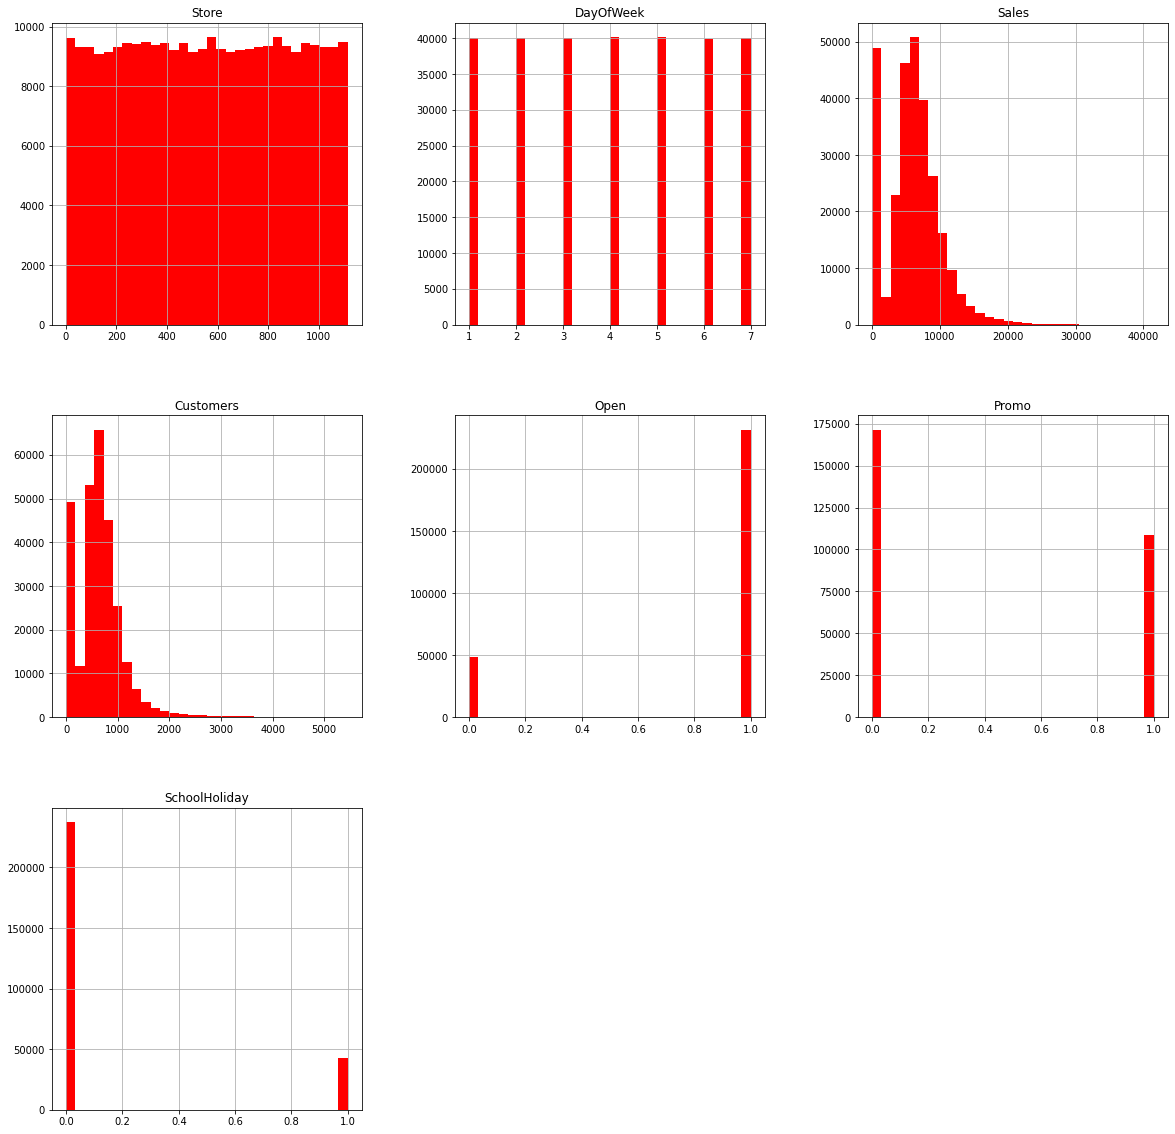

In [ ]:
# Average 600 customers per day, maximum is 4500 (note that we can't see the outlier at 7388!)
# Data is equally distibuted across various Days of the week (~150000 observations x 7 day = ~1.1 million observation) 
# Stores are open ~80% of the time
# Data is equally distributed among all stores (no bias)
# Promo #1 was running ~40% of the time 
# Average sales around 5000-6000 Euros
# School holidays are around ~18% of the time

sales_train_df.hist(bins = 30, figsize= (20,20),color = 'r')

In [ ]:
sales_train_df['Customers'].max()

5458.0

In [ ]:
# Let's see how many stores are open and closed! 
closed_train_df = sales_train_df[sales_train_df['Open']==0]
opened_train_df = sales_train_df[sales_train_df['Open']==1]

In [ ]:
# Count the number of stores that are open and closed
print('Total= ',len(sales_train_df))
print('No of closed stores ',len(closed_train_df))
print('No of Opened stores ',len(opened_train_df))

Total=  280270
No of closed stores  48673
No of Opened stores  231596


In [ ]:
# only keep open stores and remove closed stores
sales_train_df = sales_train_df[sales_train_df['Open']==1]

In [ ]:
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5.0,2015-07-31,5263.0,555.0,1.0,1.0,0,1.0
1,2,5.0,2015-07-31,6064.0,625.0,1.0,1.0,0,1.0
2,3,5.0,2015-07-31,8314.0,821.0,1.0,1.0,0,1.0
3,4,5.0,2015-07-31,13995.0,1498.0,1.0,1.0,0,1.0
4,5,5.0,2015-07-31,4822.0,559.0,1.0,1.0,0,1.0
...,...,...,...,...,...,...,...,...,...
280264,1044,6.0,2014-11-15,7136.0,1012.0,1.0,0.0,0,0.0
280265,1045,6.0,2014-11-15,4597.0,548.0,1.0,0.0,0,0.0
280266,1046,6.0,2014-11-15,7397.0,593.0,1.0,0.0,0,0.0
280267,1047,6.0,2014-11-15,3458.0,401.0,1.0,0.0,0,0.0


In [ ]:
# Let's drop the open column since it has no meaning now
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5.0,2015-07-31,5263.0,555.0,1.0,1.0,0,1.0
1,2,5.0,2015-07-31,6064.0,625.0,1.0,1.0,0,1.0
2,3,5.0,2015-07-31,8314.0,821.0,1.0,1.0,0,1.0
3,4,5.0,2015-07-31,13995.0,1498.0,1.0,1.0,0,1.0
4,5,5.0,2015-07-31,4822.0,559.0,1.0,1.0,0,1.0
...,...,...,...,...,...,...,...,...,...
280264,1044,6.0,2014-11-15,7136.0,1012.0,1.0,0.0,0,0.0
280265,1045,6.0,2014-11-15,4597.0,548.0,1.0,0.0,0,0.0
280266,1046,6.0,2014-11-15,7397.0,593.0,1.0,0.0,0,0.0
280267,1047,6.0,2014-11-15,3458.0,401.0,1.0,0.0,0,0.0


In [ ]:
# Average sales = 6955 Euros,	average number of customers = 762	(went up)
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,231596.000000,231596.000000,231596.000000,231596.000000,231596.0,231596.000000,231596.000000
mean,558.271335,3.512958,7250.869044,768.295385,1.0,0.455556,0.161341
std,321.749993,1.724640,3182.194351,401.523495,0.0,0.498022,0.367846
min,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,280.000000,2.000000,5098.000000,526.000000,1.0,0.000000,0.000000
50%,558.000000,3.000000,6648.000000,681.000000,1.0,0.000000,0.000000
75%,837.000000,5.000000,8703.000000,897.000000,1.0,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,5458.000000,1.0,1.000000,1.000000


TASK #3.2: EXPLORE STORES INFORMATION DATA

In [ ]:
# Let's see if we have any missing data in the store information dataframe!
sns.heatmap(store_info_df.isnull(),yticklabels= False,cbar =False,cmap= 'Blues')

NameError: ignored

In [ ]:
# Let's take a look at the missing values in the 'CompetitionDistance'
# Only 3 rows are missing 
store_info_df[store_info_df['CompetitionDistance'].isnull()]


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [ ]:
# Let's take a look at the missing values in the 'CompetitionOpenSinceMonth'
# many rows are missing = 354 (almost one third of the 1115 stores)
store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()]

NameError: ignored

In [ ]:
store_info_df[store_info_df['Promo2']==0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
# It seems like if 'promo2' is zero, 'promo2SinceWeek', 'Promo2SinceYear', and 'PromoInterval' information is set to zero
# There are 354 rows where 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' is missing
# Let's set these values to zeros 
str_cols=['Promo2SinceWeek','Promo2SinceYear','PromoInterval','CompetitionOpenSinceYear','CompetitionOpenSinceMonth']

In [ ]:
for str in str_cols:
  store_info_df[str].fillna(0,inplace = True)

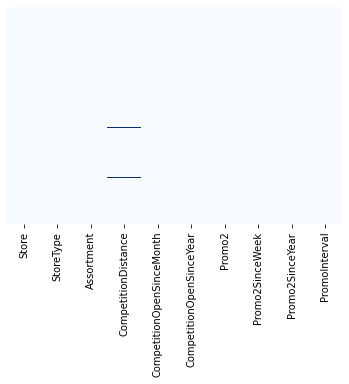

In [ ]:
# There are 3 rows with 'competitionDistance' values missing, let's fill them up with with average values of the 'CompetitionDistance' column
sns.heatmap(store_info_df.isnull(),yticklabels= False,cbar =False,cmap= 'Blues')

In [ ]:
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(),inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f968e0458d0>,
      dtype=object)

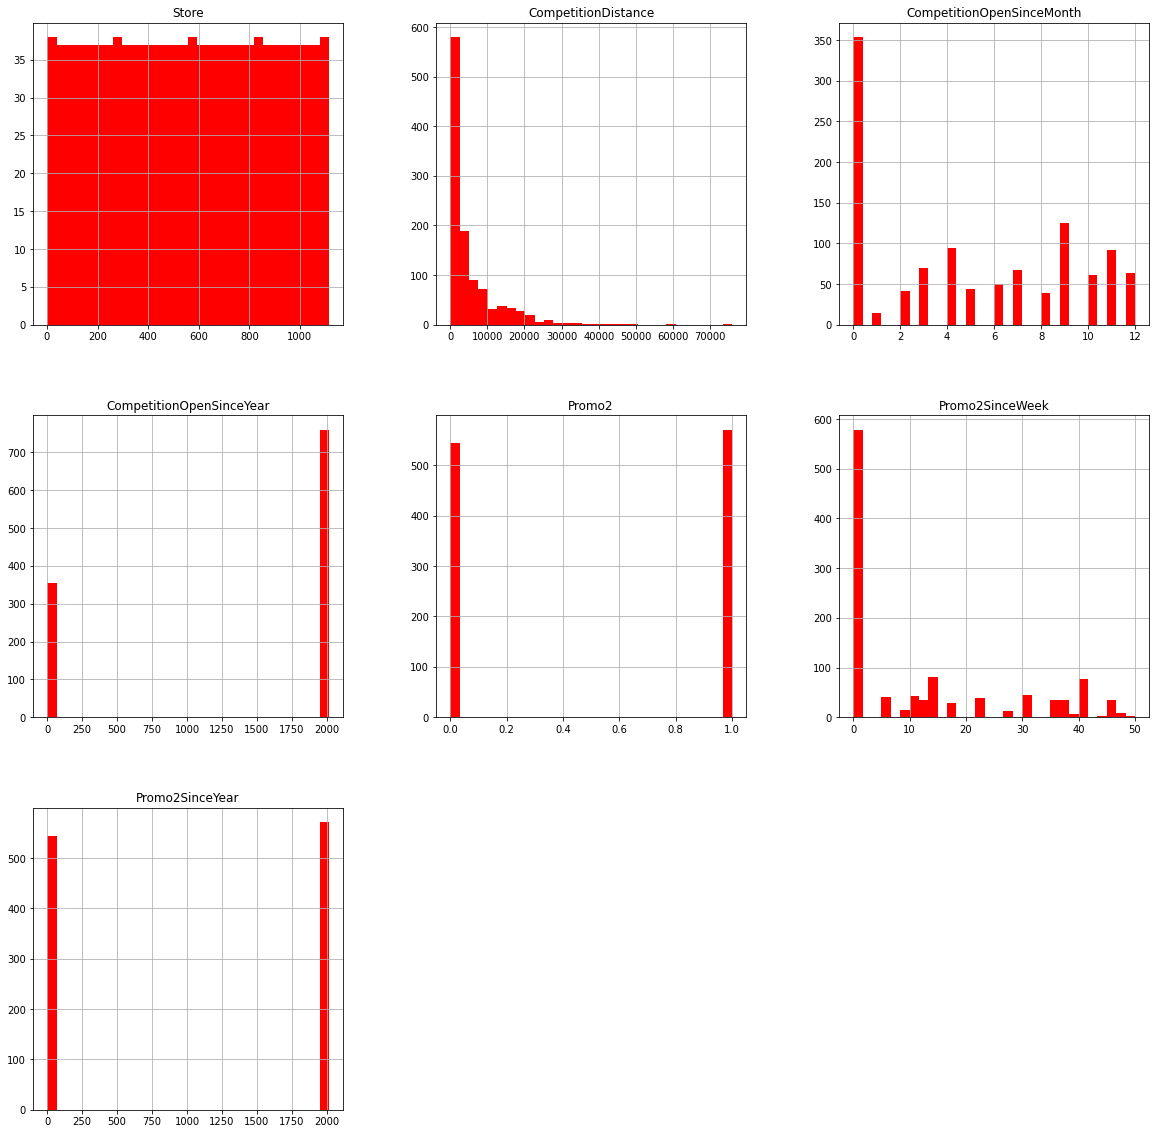

In [ ]:
# half of stores are involved in promo 2
# half of the stores have their competition at a distance of 0-3000m (3 kms away)

store_info_df.hist(bins=30,figsize =(20,20),color= 'r')

TASK #3.3: EXPLORE MERGED DATASET 

In [ ]:
# Let's merge both data frames together based on 'store'
sales_train_all_df = pd.merge(sales_train_df,store_info_df,how = 'inner', on ='Store')

In [ ]:
sales_train_all_df.drop('Open',axis=1, inplace= True)

KeyError: ignored

In [ ]:

# customers and promo are positively correlated with the sales 
# Promo2 does not seem to be effective at all 
correaltions = sales_train_all_df.corr()['Sales'].sort_values()
correaltions

DayOfWeek                   -0.180167
Promo2SinceYear             -0.125909
Promo2                      -0.125892
Promo2SinceWeek             -0.058455
CompetitionOpenSinceMonth   -0.033110
CompetitionDistance         -0.030404
CompetitionOpenSinceYear    -0.012226
Store                        0.003531
SchoolHoliday                0.071350
Promo                        0.361018
Customers                    0.815540
Sales                        1.000000
Name: Sales, dtype: float64

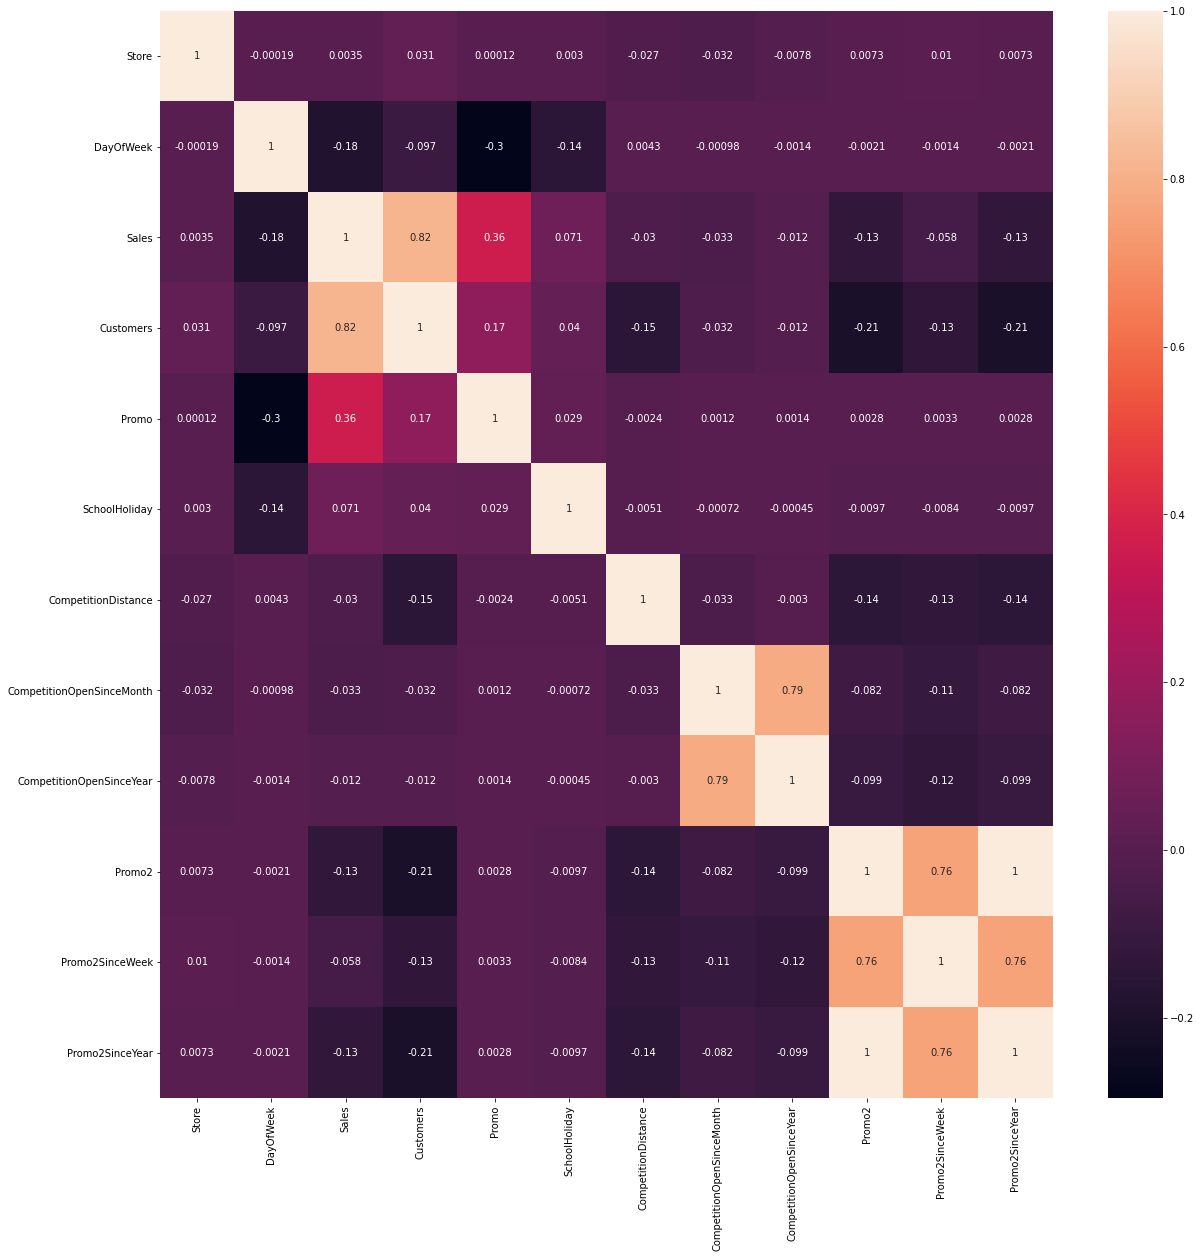

In [ ]:

# Customers/Prmo2 and sales are strongly correlated 

correaltions = sales_train_all_df.corr()
f , ax = plt.subplots(figsize= (20,20))
sns.heatmap(correaltions, annot = True)


In [ ]:
# Let's separate the year and put it into a separate column 
sales_train_all_df['Year']= pd.DatetimeIndex(sales_train_all_df['Date']).year
sales_train_all_df['Month']= pd.DatetimeIndex(sales_train_all_df['Date']).month
sales_train_all_df['Day']= pd.DatetimeIndex(sales_train_all_df['Date']).day
sales_train_all_df


,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5.0,2015-07-31,5263.0,555.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4.0,2015-07-30,5020.0,546.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3.0,2015-07-29,4782.0,523.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2.0,2015-07-28,5011.0,560.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1.0,2015-07-27,6102.0,612.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231591,292,4.0,2014-11-20,5359.0,759.0,0.0,0,0.0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2014,11,20
231592,292,3.0,2014-11-19,5237.0,691.0,0.0,0,0.0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2014,11,19
231593,292,2.0,2014-11-18,5636.0,732.0,0.0,0,0.0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2014,11,18
231594,292,1.0,2014-11-17,6277.0,845.0,0.0,0,0.0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2014,11,17


In [ ]:
# Let's do the same for the Day and Month


Text(0.5, 1.0, 'Average Customers per month')

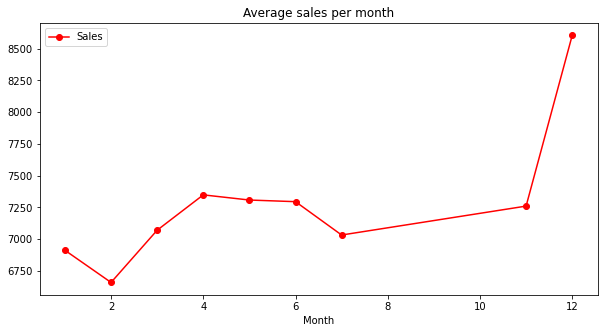

<Figure size 432x288 with 0 Axes>

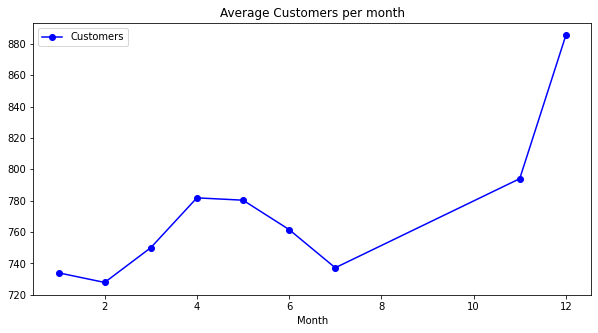

In [ ]:
# Let's take a look at the average sales and number of customers per month 
# 'groupby' works great by grouping all the data that share the same month column, then obtain the mean of the sales column  
# It looks like sales and number of customers peak around christmas timeframe

axis = sales_train_all_df.groupby('Month')[['Sales']].mean().plot(figsize = (10,5),marker = 'o',color='r')
axis.set_title('Average sales per month')
plt.figure()
axis = sales_train_all_df.groupby('Month')[['Customers']].mean().plot(figsize = (10,5),marker = 'o',color='b')
axis.set_title('Average Customers per month')

Text(0.5, 1.0, 'Average Customers per day')

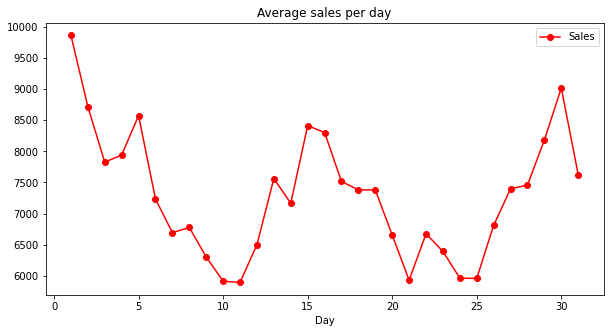

<Figure size 432x288 with 0 Axes>

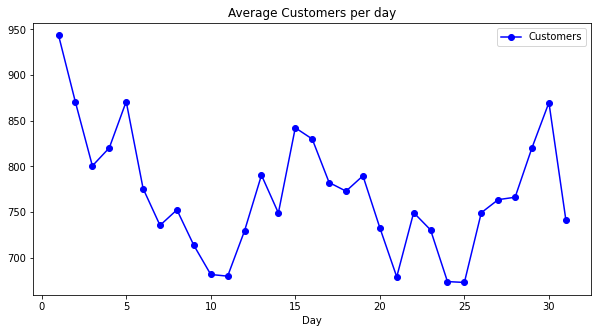

In [ ]:
# Let's take a look at the sales and customers per day of the month instead
# Minimum number of customers are generally around the 24th of the month 
# Most customers and sales are around 30th and 1st of the month

axis = sales_train_all_df.groupby('Day')[['Sales']].mean().plot(figsize = (10,5),marker = 'o',color='r')
axis.set_title('Average sales per day')
plt.figure()
axis = sales_train_all_df.groupby('Day')[['Customers']].mean().plot(figsize = (10,5),marker = 'o',color='b')
axis.set_title('Average Customers per day')

Text(0.5, 1.0, 'Average Customers per day of the week')

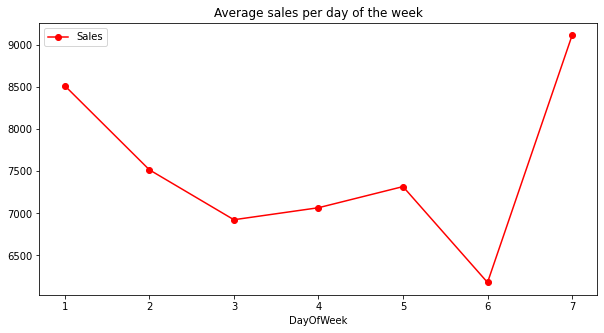

<Figure size 432x288 with 0 Axes>

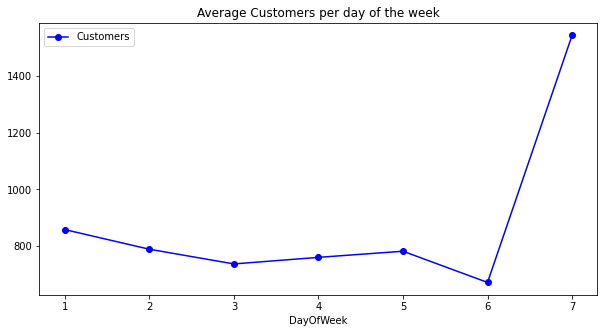

In [ ]:
# Let's do the same for the day of the week  (note that 7 = Sunday)
axis = sales_train_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10,5),marker = 'o',color='r')
axis.set_title('Average sales per day of the week')
plt.figure()
axis = sales_train_all_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10,5),marker = 'o',color='b')
axis.set_title('Average Customers per day of the week')


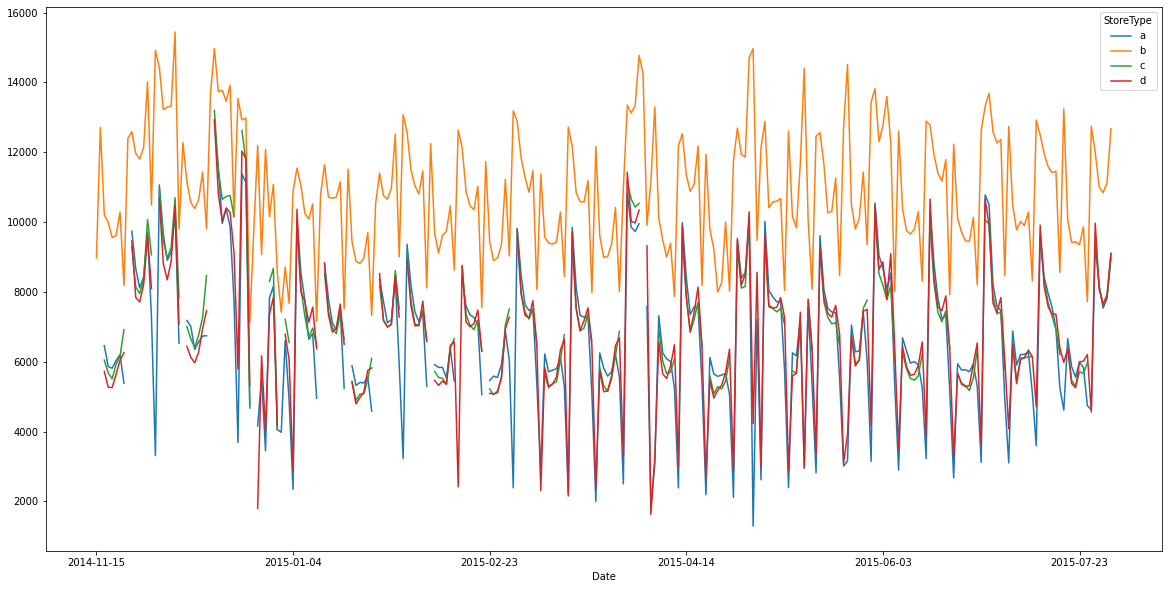

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
sales_train_all_df.groupby(['Date','StoreType']).mean()['Sales'].unstack().plot(ax=ax)

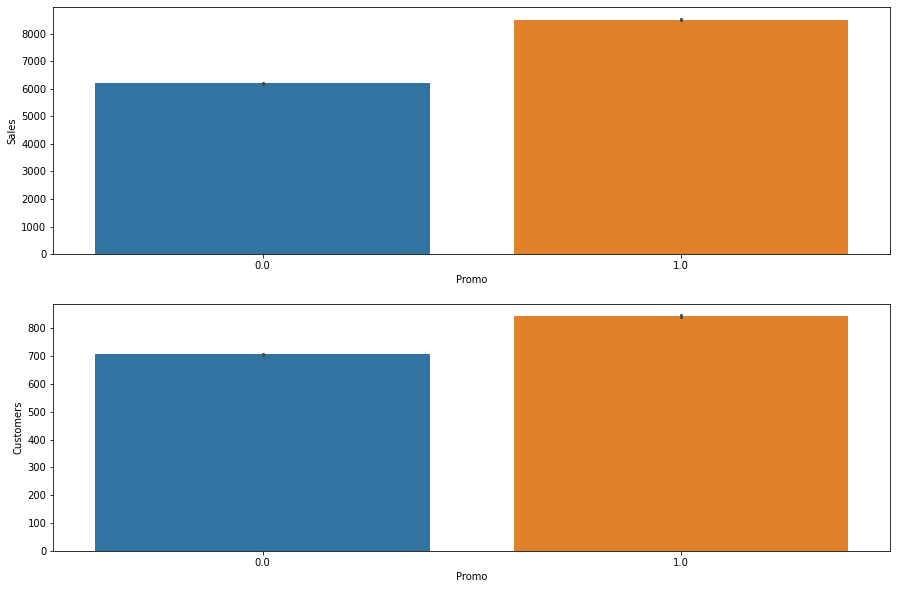

In [ ]:
plt.figure(figsize =[15,10])
plt.subplot(211)
sns.barplot(x = 'Promo',y = 'Sales', data = sales_train_all_df)
plt.subplot(212)
sns.barplot(x = 'Promo',y = 'Customers', data = sales_train_all_df)

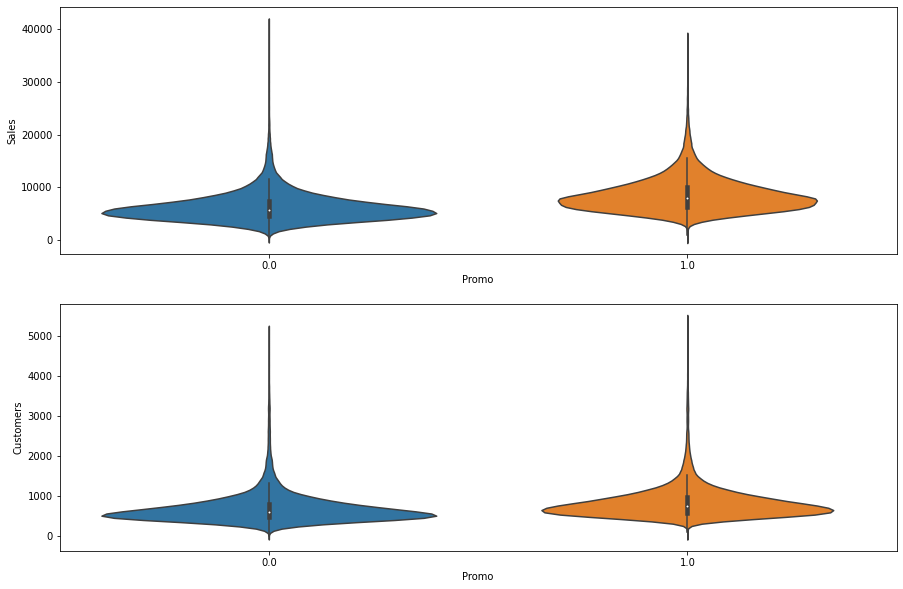

In [ ]:
plt.figure(figsize =[15,10])
plt.subplot(211)
sns.violinplot(x = 'Promo',y = 'Sales', data = sales_train_all_df)
plt.subplot(212)
sns.violinplot(x = 'Promo',y = 'Customers', data = sales_train_all_df)

# TASK #4: UNDERSTAND THE INTUITION BEHIND FACEBOOK PROPHET

![alt text](https://drive.google.com/uc?id=1I4lBgLaqERF_-lpGYLuht02wJmwcLGG-)

![alt text](https://drive.google.com/uc?id=1CZ24f-TbnRzaXV9Arke0fNTUm7Kon1gK)

![alt text](https://drive.google.com/uc?id=16gaoTeeuU5PxNZRHt8n2XyFJ52ft1xb7)

# TASK #5: TRAIN THE MODEL PART A

In [ ]:
# import prophet 

!pip install fbprophet
from fbprophet import Prophet 

Prophet

fbprophet.forecaster.Prophet

In [ ]:
def sales_predictions(Store_ID,sales_df,periods):
  sales_df = sales_df[sales_df['Store']==Store_ID]
  sales_df = sales_df[['Date','Sales']].rename(columns = {'Date':'ds' ,'Sales':'y'})
  sales_df = sales_df.sort_values('ds')

  model = Prophet()
  model.fit(sales_df)
  future = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure = model.plot(forecast,xlabel='Date',ylabel='Sales')
  figure2 = model.plot_components(forecast)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


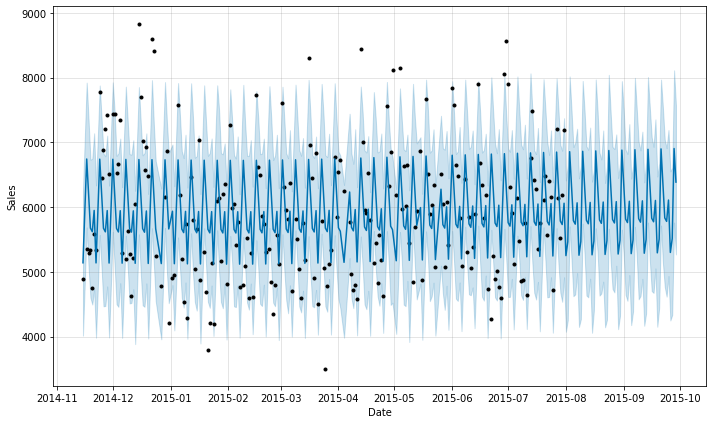

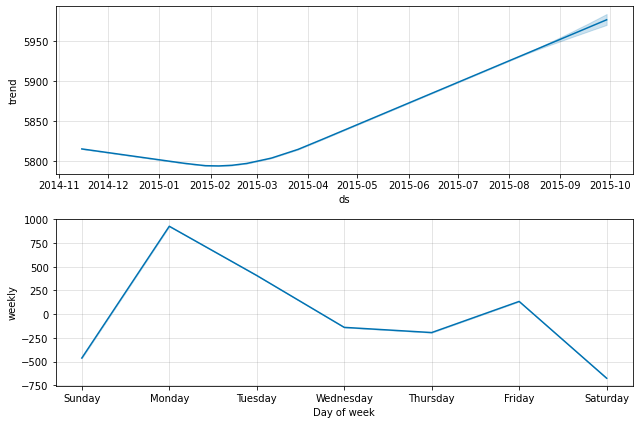

In [ ]:
sales_predictions(10,sales_train_all_df,60)

NameError: ignored

# TASK #6: TRAIN THE MODEL PART B


   - StateHoliday: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
   - SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools
  






In [ ]:
def sales_predictions(Store_ID,sales_df,holidays,periods):
  sales_df = sales_df[sales_df['Store']==Store_ID]
  sales_df = sales_df[['Date','Sales']].rename(columns = {'Date':'ds' ,'Sales':'y'})
  sales_df = sales_df.sort_values('ds')

  model = Prophet(holidays=holidays)
  model.fit(sales_df)
  future = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure = model.plot(forecast,xlabel='Date',ylabel='Sales')
  figure2 = model.plot_components(forecast)


In [ ]:
# Get all the dates pertaining to school holidays 
school_holidays = sales_train_all_df[sales_train_all_df['SchoolHoliday']==1].loc[:,'Date'].values
school_holidays.shape

(37366,)

In [ ]:
# Get all the dates pertaining to state holidays 
state_holidays = sales_train_all_df[(sales_train_all_df['StateHoliday']=='a')|(sales_train_all_df['StateHoliday']=='b')|(sales_train_all_df['StateHoliday']=='c')].loc[:,'Date'].values
state_holidays.shape

(277,)

In [ ]:
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays),'holiday':'state_holiday'})

In [ ]:
state_holidays

,ds,holiday
0,2015-06-04,state_holiday
1,2015-06-04,state_holiday
2,2015-05-01,state_holiday
3,2015-06-04,state_holiday
4,2015-06-04,state_holiday
...,...,...
272,2015-05-25,state_holiday
273,2015-05-14,state_holiday
274,2015-04-06,state_holiday
275,2014-12-26,state_holiday


In [ ]:
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays),'holiday':'school_holidays'})

In [ ]:
school_holidays

,ds,holiday
0,2015-07-31,school_holidays
1,2015-07-30,school_holidays
2,2015-07-29,school_holidays
3,2015-07-28,school_holidays
4,2015-07-27,school_holidays
...,...,...
37361,2014-12-30,school_holidays
37362,2014-12-29,school_holidays
37363,2014-12-24,school_holidays
37364,2014-12-23,school_holidays


In [ ]:
# concatenate both school and state holidays 
school_state_hoildays = pd.concat((state_holidays,school_holidays))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


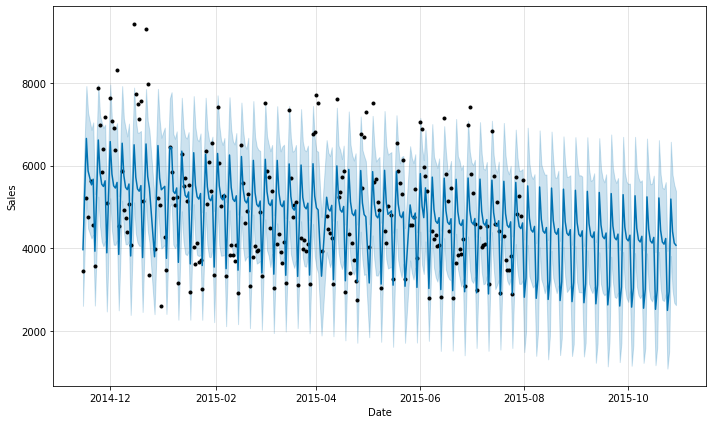

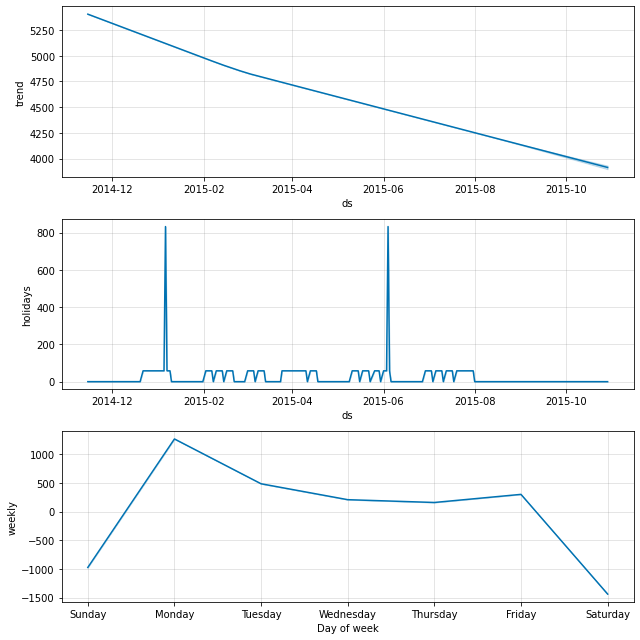

In [ ]:
# Let's make predictions using holidays for a specific store
sales_predictions(6,sales_train_all_df,school_state_hoildays,90)

# EXCELLENT JOB!